<a href="https://colab.research.google.com/github/ayushtyagi04/data-analytics-projects/blob/main/Ayush_Tyagi_var.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data as pdr
import yfinance as yf


import datetime as dt
import time
from scipy import stats

# Plotting Style
sns.set_style('whitegrid')

%matplotlib inline


In [ ]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
weights = np.array([0.25, 0.25, 0.25, 0.25])


start = dt.datetime(2020, 6, 23)
end = dt.datetime.today()


prices = pd.DataFrame()

# Fetch data
for ticker in tickers:
    print(f"Fetching {ticker}...", end=" ")
    try:
        df = yf.Ticker(ticker).history(
            start=start.strftime('%Y-%m-%d'),
            end=end.strftime('%Y-%m-%d'),
            auto_adjust=True
        )
        series = df['Close']
        print("✓ yfinance", end="")
    except Exception as e:
        print(f"✗ yfinance ({e}); falling back to Stooq...", end="")
        df2 = pdr.DataReader(ticker, 'stooq', start, end)
        df2 = df2.sort_index()
        series = df2['Close']

    # Merge data into prices
    prices[ticker] = series
    time.sleep(1)
    print()


prices = prices.dropna(how='all').ffill().bfill()


print(prices.tail())

Fetching AAPL... ✓ yfinance
Fetching MSFT... ✓ yfinance
Fetching GOOGL... ✓ yfinance
Fetching AMZN... ✓ yfinance
                                 AAPL        MSFT       GOOGL        AMZN
Date                                                                     
2025-06-17 00:00:00-04:00  195.639999  478.040009  175.949997  214.820007
2025-06-18 00:00:00-04:00  196.580002  480.239990  173.320007  212.520004
2025-06-20 00:00:00-04:00  201.000000  477.399994  166.639999  209.690002
2025-06-23 00:00:00-04:00  201.500000  486.000000  165.190002  208.470001
2025-06-24 00:00:00-04:00  200.300003  490.109985  166.770004  212.770004


In [ ]:
logR = np.log(prices / prices.shift(1)).dropna()
logR.tail()

,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2025-06-17 00:00:00-04:00,-0.014110,-0.002298,-0.004650,-0.005941
2025-06-18 00:00:00-04:00,0.004793,0.004592,-0.015060,-0.010764
2025-06-20 00:00:00-04:00,0.022235,-0.005931,-0.039304,-0.013406
2025-06-23 00:00:00-04:00,0.002484,0.017854,-0.008739,-0.005835
2025-06-24 00:00:00-04:00,-0.005973,0.008421,0.009519,0.020417


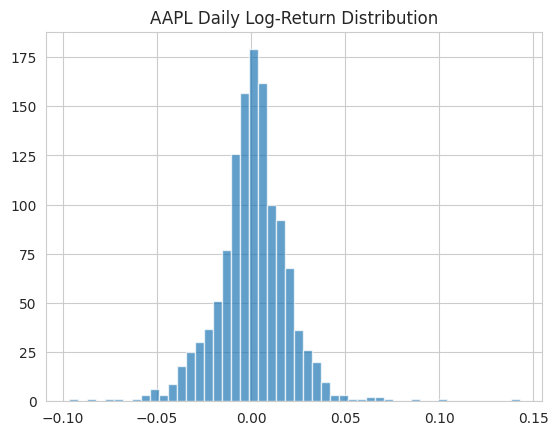

In [ ]:

logR['AAPL'].hist(bins=50, alpha=0.7)
plt.title('AAPL Daily Log-Return Distribution')
plt.show()

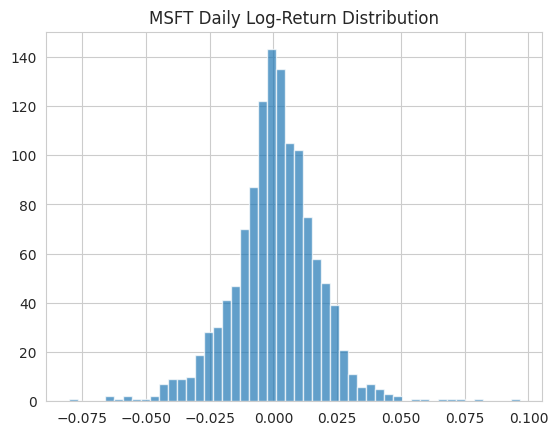

In [ ]:
logR['MSFT'].hist(bins=50, alpha=0.7)
plt.title('MSFT Daily Log-Return Distribution')
plt.show()

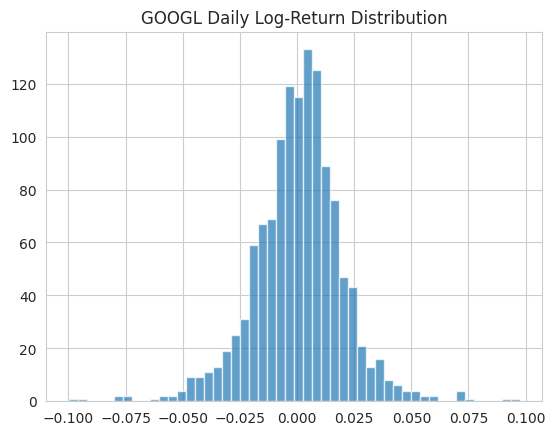

In [ ]:
logR['GOOGL'].hist(bins=50, alpha=0.7)
plt.title('GOOGL Daily Log-Return Distribution')
plt.show()

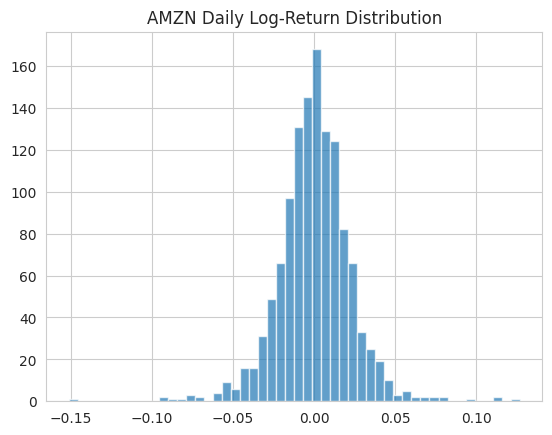

In [ ]:
logR['AMZN'].hist(bins=50, alpha=0.7)
plt.title('AMZN Daily Log-Return Distribution')
plt.show()

In [ ]:

summary = pd.DataFrame({
    'Mean': logR.mean(),
    'Variance': logR.var(),
    'Skewness': logR.skew(),
    'Kurtosis': logR.kurtosis()
})

summary


,Mean,Variance,Skewness,Kurtosis
AAPL,0.000645,0.000352,0.197199,4.945824
MSFT,0.000740,0.000287,0.006962,2.615565
GOOGL,0.000660,0.000385,-0.154872,2.914093
AMZN,0.000343,0.000505,-0.048585,4.582753


In [ ]:
mu_norm, sigma_norm = logR.stack().mean(), logR.stack().std(ddof=1)

N = logR.size
z95 = stats.norm.ppf(0.975)
ci_mu_norm = (
    mu_norm - z95 * sigma_norm / np.sqrt(N),
    mu_norm + z95 * sigma_norm / np.sqrt(N)
)


df = N - 1
chi2_low, chi2_high = stats.chi2.ppf([0.025, 0.975], df)
ci_sigma_norm = (
    sigma_norm * np.sqrt(df / chi2_high),
    sigma_norm * np.sqrt(df / chi2_low)
)

print("Normal fit:")
print(f"μ = {mu_norm:.5f}, 95% CI {ci_mu_norm}")
print(f"σ = {sigma_norm:.5f}, 95% CI {ci_sigma_norm}")


Normal fit:
μ = 0.00060, 95% CI (np.float64(5.660422532224863e-05), np.float64(0.0011379656170055997))
σ = 0.01955, 95% CI (np.float64(0.019178226227250548), np.float64(0.01994321211883067))


In [ ]:
returns_flat = logR.stack().values

In [ ]:
logR = np.log(prices / prices.shift(1)).dropna()


print("Log returns:")
print(logR.tail())
print("returns flat:")
print(returns_flat[:10])


Log returns:
                               AAPL      MSFT     GOOGL      AMZN
Date                                                             
2025-06-17 00:00:00-04:00 -0.014110 -0.002298 -0.004650 -0.005941
2025-06-18 00:00:00-04:00  0.004793  0.004592 -0.015060 -0.010764
2025-06-20 00:00:00-04:00  0.022235 -0.005931 -0.039304 -0.013406
2025-06-23 00:00:00-04:00  0.002484  0.017854 -0.008739 -0.005835
2025-06-24 00:00:00-04:00 -0.005973  0.008421  0.009519  0.020417
returns flat:
[-0.01780931 -0.02036346 -0.02159814 -0.01091522  0.01318794  0.01255748
  0.00584604  0.00735297 -0.03120743 -0.02021906]


In [ ]:
df_t, mu_t, sigma_t = stats.t.fit(returns_flat)


In [ ]:

B = 1000
N = len(returns_flat)

estimates = np.array([
    stats.t.fit(np.random.choice(returns_flat, size=N, replace=True))
    for _ in range(B)
])

ci_mu_t = np.percentile(estimates[:, 1], [2.5, 97.5])
ci_sigma_t = np.percentile(estimates[:, 2], [2.5, 97.5])

print("\nStudent's t fit:")
print(f" df = {df_t:.1f}, μ = {mu_t:.5f}, σ = {sigma_t:.5f}")
print(f" 95% CI for μ (bootstrap): {ci_mu_t}")
print(f" 95% CI for σ (bootstrap): {ci_sigma_t}")



Student's t fit:
 df = 4.2, μ = 0.00088, σ = 0.01436
 95% CI for μ (bootstrap): [0.00044155 0.001337  ]
 95% CI for σ (bootstrap): [0.01387369 0.01487988]


In [ ]:
# Compute portfolio returns
portR = logR.dot(weights)

μ_p = portR.mean()
σ_p = portR.std(ddof=1)

z05 = stats.norm.ppf(0.05)
VaR_norm = - (μ_p + σ_p * z05)
print(VaR_norm)

t05 = stats.t.ppf(0.05, df_t)
VaR_t = - (μ_p + σ_p * t05) * 1
print(VaR_t)

0.026789059985245865
0.03438038637716836


In [ ]:
1# One-sample t-test: H0: μ = 0 vs H1: μ ≠ 0
t_stat, p_val = stats.ttest_1samp(portR, 0.0)
print("One-sample t-test on portfolio daily returns:")
print(f"t-statistic = {t_stat:.3f},  p-value = {p_val:.3f}")

if p_val < 0.05:
    print("* Reject H0: mean return is significantly different from zero.")
else:
    print("Fail to reject H0: no evidence mean return ≠ 0.")


One-sample t-test on portfolio daily returns:
t-statistic = 1.271,  p-value = 0.204
Fail to reject H0: no evidence mean return ≠ 0.


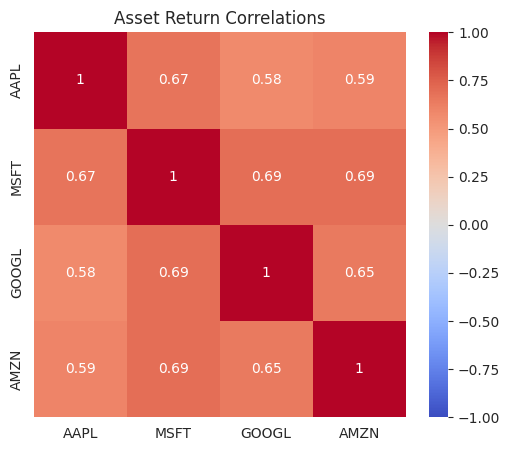

Weighted avg σ: 0.0195
Actual portfolio σ: 0.0166
Diversification benefit: 0.0028


In [ ]:
# 7. Correlation & Diversification Benefit
import seaborn as sns

# a) Correlation heatmap
corr = logR.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Asset Return Correlations')
plt.show()

# b) Diversification benefit
σ_i = logR.std()                         # individual volatilities
σ_weighted = np.dot(weights, σ_i)       # naive weighted avg
σ_portfolio = σ_p                       # from earlier

print(f"Weighted avg σ: {σ_weighted:.4f}")
print(f"Actual portfolio σ: {σ_portfolio:.4f}")
print(f"Diversification benefit: {σ_weighted - σ_portfolio:.4f}")


Max Drawdown: -43.98%
From 2021-12-10 to 2023-01-05


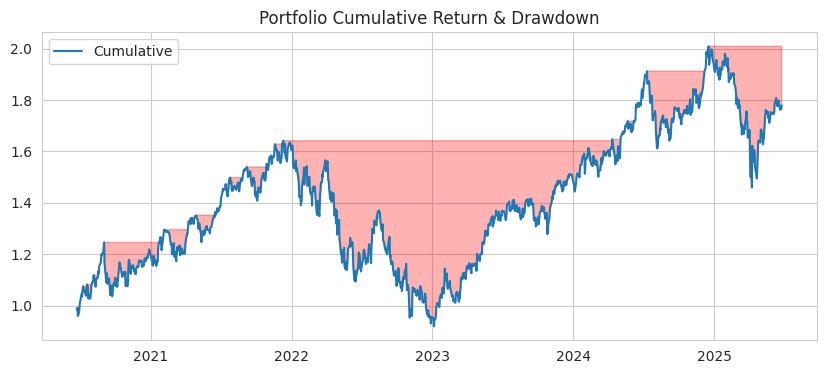

In [ ]:
# 8. Max Drawdown
cum_ret = (prices / prices.iloc[0]).prod(axis=1)  # cumulative portfolio growth?
# Actually for portfolio: cum_port = (portR + 1).cumprod()
cum_port = (portR + 1).cumprod()

rolling_max = cum_port.cummax()
drawdown = (cum_port - rolling_max) / rolling_max

max_dd = drawdown.min()
end_date = drawdown.idxmin()
start_date = cum_port[:end_date].idxmax()

print(f"Max Drawdown: {max_dd:.2%}")
print(f"From {start_date.date()} to {end_date.date()}")

# Plot
plt.figure(figsize=(10,4))
plt.plot(cum_port, label='Cumulative')
plt.fill_between(drawdown.index, cum_port, rolling_max,
                 where=drawdown<0, color='red', alpha=0.3)
plt.title('Portfolio Cumulative Return & Drawdown')
plt.legend()
plt.show()


In [ ]:
# 9. Expected Shortfall (CVaR at 95%)
alpha = 0.05

# Historical ES
es_hist = - portR[portR <= np.percentile(portR, 5)].mean()

# Parametric ES under Normal: μ + σ * φ(z) / α
es_norm = - (μ_p - σ_p * stats.norm.pdf(1.645) / alpha)

print(f"Historical ES (95%): {es_hist:.5f}")
print(f"Parametric Normal ES (95%): {es_norm:.5f}")


Historical ES (95%): 0.03803
Parametric Normal ES (95%): 0.03374


In [ ]:
# 10. VaR Backtesting
var_series = -(portR.rolling(1).mean() + portR.rolling(1).std() * z05)

# For simplicity use constant VaR_norm
exceptions = portR < -VaR_norm
num_exc = exceptions.sum()
total = len(portR)

print(f"Exceptions: {num_exc}/{total} days ({num_exc/total:.2%}, expected ~5%)")


Exceptions: 68/1256 days (5.41%, expected ~5%)


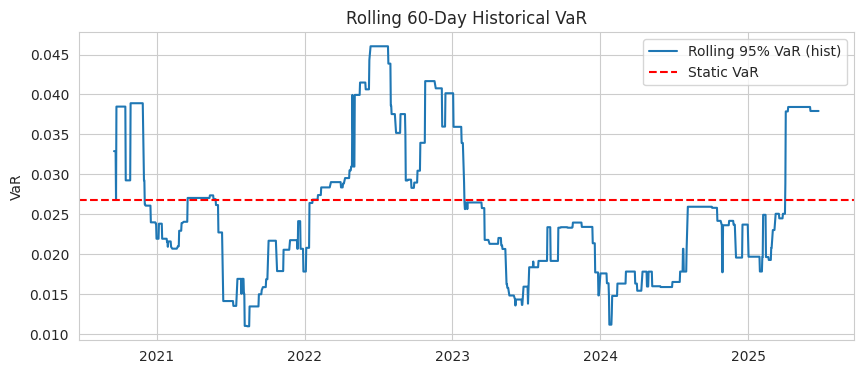

In [ ]:
window = 60

# Use a 60-day window — look at the most recent 60 days each time.
roll_var = portR.rolling(window).quantile(0.05).dropna()

plt.figure(figsize=(10,4))
plt.plot(-roll_var, label='Rolling 95% VaR (hist)')

# Static VaR line
plt.axhline(VaR_norm, color='red', linestyle='--', label='Static VaR')

# Add title, label, legend, and show plot
plt.title('Rolling 60-Day Historical VaR')
plt.ylabel('VaR')
plt.legend()
plt.show()


In [ ]:
# 12. Jarque-Bera Normality Test
jb_stat, jb_p = stats.jarque_bera(portR)
print(f"JB statistic = {jb_stat:.2f}, p-value = {jb_p:.3f}")

if jb_p < 0.05:
    print("Reject normality at 5% level.")
else:
    print("Cannot reject normality.")


JB statistic = 461.49, p-value = 0.000
Reject normality at 5% level.
